In [80]:
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize
import glob,os
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime
from datetime import timedelta
from datetime import datetime
import chinadata.ca_data as ts
pro = ts.pro_api(token="e9e84ed87f29cf43fdac84cdbb14d306787")

In [81]:
#导入股票交易的文件
path_1 = r'/Users/rayjiang/Desktop/SJTU/2024Fall/金融理论与政策/个人作业/Chinese-Multi-factor-Model-main/日个股回报率文件145141905(仅供上海交通大学使用)'
file_1 = glob.glob(os.path.join(path_1, "TRD_Dalyr**.csv"))
file_list_1 = []
for i in file_1:
    fd_file = pd.read_csv(i, index_col=None)
    #剔除B股、科创板；剔除ST股
    fd_file = fd_file.query('Trdsta == 1').query('(Markettype == 1) | (Markettype == 4) | (Markettype == 16)')
    file_list_1.append(fd_file)
fd_stock_trade = pd.concat(file_list_1)
fd_stock_trade

,Stkcd,Trddt,Dsmvosd,Dretnd,Markettype,Trdsta,ChangeRatio
0,600793,2017-05-11,3819231.0,-0.001377,1,1,-0.001377
1,600793,2017-05-12,3838185.0,0.004963,1,1,0.004963
2,600793,2017-05-15,3845556.0,0.001920,1,1,0.001920
3,600793,2017-05-16,3826602.0,-0.004929,1,1,-0.004929
4,600793,2017-05-17,3830814.0,0.001101,1,1,0.001101
...,...,...,...,...,...,...,...
999995,600235,2005-08-29,477360.0,0.001855,1,1,0.001855
999996,600235,2005-08-30,461448.0,-0.033333,1,1,-0.033333
999997,600235,2005-08-31,473824.0,0.026820,1,1,0.026820
999998,600235,2005-09-01,494156.0,0.042910,1,1,0.042910


In [82]:
# 导入股票指标的文件
path_2 = r'/Users/rayjiang/Desktop/SJTU/2024Fall/金融理论与政策/个人作业/Chinese-Multi-factor-Model-main/个股日交易衍生指标162622787(仅供上海交通大学使用)'
file_2 = glob.glob(os.path.join(path_2, 'STK_MKT_DALYR**.csv'))
fd_stock_pb = pd.DataFrame()

for i in file_2:
    fd_file = pd.read_csv(i, index_col=None)
    fd_stock_pb = pd.concat([fd_stock_pb, fd_file], ignore_index=True)

# columns重命名
fd_stock_pb.rename(columns={'Symbol': 'Stkcd', 'TradingDate': 'Trddt'}, inplace=True)
fd_stock_pb

,Trddt,Stkcd,ShortName,SecurityID,Ret,PE,PB,PCF,PS,Turnover,CirculatedMarketValue,ChangeRatio,Amount,Liquidility
0,2021-08-12,603997,继峰股份,201004157074,1.884817,NaN,2.230759,NaN,0.647575,0.00918,7.912307e+09,0.00000,72394880,0.000181
1,2021-08-13,603997,继峰股份,201004157074,1.873049,NaN,2.244774,NaN,0.651643,0.01503,7.962018e+09,0.00628,119407601,0.000168
2,2021-08-16,603997,继峰股份,201004157074,1.941748,NaN,2.165355,NaN,0.628588,0.01366,7.680323e+09,-0.03538,105607709,0.000183
3,2021-08-17,603997,继峰股份,201004157074,1.995565,NaN,2.106958,NaN,0.611636,0.00952,7.473195e+09,-0.02697,72095628,0.000199
4,2021-08-18,603997,继峰股份,201004157074,2.027027,NaN,2.074255,NaN,0.602143,0.00887,7.357203e+09,-0.01552,65365090,0.000202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14169958,2024-12-24,920128,胜业电气,201004301084,NaN,54.312033,7.867516,NaN,4.303256,0.08465,5.369400e+08,0.00319,44924835,0.000285
14169959,2024-12-25,920128,胜业电气,201004301084,NaN,51.406166,7.446579,NaN,4.073018,0.08096,5.082120e+08,-0.05350,42048224,0.000340
14169960,2024-12-26,920128,胜业电气,201004301084,NaN,52.392085,7.589397,NaN,4.151135,0.08987,5.179590e+08,0.01918,46849880,0.000343
14169961,2024-12-27,920128,胜业电气,201004301084,NaN,52.236414,7.566847,NaN,4.138800,0.05998,5.164200e+08,-0.00297,31075550,0.000331


In [83]:
#合并数据
fd_info = pd.merge(fd_stock_trade,fd_stock_pb,on=['Stkcd','Trddt'],how = 'inner' ) #取交集
fd_info = fd_info.sort_values(['Stkcd','Trddt'])
fd_info['Trddt'] = pd.to_datetime(fd_info['Trddt'])

In [84]:
fd_info

,Stkcd,Trddt,Dsmvosd,Dretnd,Markettype,Trdsta,ChangeRatio_x,ShortName,SecurityID,Ret,PE,PB,PCF,PS,Turnover,CirculatedMarketValue,ChangeRatio_y,Amount,Liquidility
11562974,1,2005-01-04,9189040.01,-0.010622,4,1,-0.010622,深发展A,201000000001,NaN,43.781528,2.708148,NaN,2.831354,0.00125,9.189040e+09,-0.01062,11465602,0.000926
11562975,1,2005-01-05,9104478.29,-0.009202,4,1,-0.009202,深发展A,201000000001,NaN,43.378630,2.683227,NaN,2.805298,0.00229,9.104478e+09,-0.00920,20718558,0.000685
11562976,1,2005-01-06,9189040.01,0.009288,4,1,0.009288,深发展A,201000000001,NaN,43.781528,2.708148,NaN,2.831354,0.00189,9.189040e+09,0.00929,17333840,0.000635
11562977,1,2005-01-07,9174946.39,-0.001534,4,1,-0.001534,深发展A,201000000001,NaN,43.714378,2.703995,NaN,2.827011,0.00134,9.174946e+09,-0.00153,12302853,0.000508
11562978,1,2005-01-10,9287695.35,0.012289,4,1,0.012289,深发展A,201000000001,NaN,44.251575,2.737224,NaN,2.861752,0.00187,9.287695e+09,0.01229,17111498,0.000550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3694821,605599,2024-12-24,8796666.92,0.018919,1,1,0.018919,菜百股份,201004206244,NaN,12.445985,2.320957,72.610339,0.531449,0.00404,8.796667e+09,0.01892,35305663,0.000202
3694822,605599,2024-12-25,8851111.36,0.006189,1,1,0.006189,菜百股份,201004206244,NaN,12.523016,2.335322,73.059740,0.534739,0.00432,8.851111e+09,0.00619,37892070,0.000200
3694823,605599,2024-12-26,8827778.03,-0.002636,1,1,-0.002636,菜百股份,201004206244,NaN,12.490003,2.329166,72.867140,0.533329,0.00420,8.827778e+09,-0.00264,37208491,0.000193
3694824,605599,2024-12-27,8944444.70,0.013216,1,1,0.013216,菜百股份,201004206244,NaN,12.655069,2.359947,73.830141,0.540377,0.00410,8.944445e+09,0.01322,36510958,0.000202


In [85]:
#对数据进行进一步筛选（次新股、退市公司、缺失值、重复值）
basic_data = pro.stock_basic(exchange='', fields='ts_code,symbol,list_status,list_date')
basic_data['list_date'] = pd.to_datetime(basic_data['list_date'])
basic_data = basic_data.rename(columns={'symbol':'Stkcd'})
basic_data['Stkcd'] = basic_data['Stkcd'].astype('int')
basic_data.drop_duplicates('Stkcd')
fd_new_info = pd.merge(fd_info,basic_data,on = 'Stkcd') #多对一合并
#剔除次新股
fd_new_info['delta'] = fd_new_info['Trddt'] - fd_new_info['list_date']
fd_new_info = fd_new_info[fd_new_info['delta'] > timedelta(120)]
#剔除退市公司
fd_new_info = fd_new_info.query('(list_status == "L")')
#剔除缺失值、重复值
fd_new_info.dropna()
fd_new_info.drop_duplicates(['Stkcd','Trddt'])
fd_new_info = fd_new_info.set_index('Trddt',drop=False)

In [86]:
#将数据转换为月度数据，并剔除每月交易少于14天的股票
#保留每个月第一天的交易数据（调仓）
fd_trade_month = fd_new_info.groupby(fd_new_info['Stkcd']).resample('M').first()
#剔除每月交易日少于14天的数据
fd_trade_month['count'] = fd_new_info['Trdsta'].groupby(fd_new_info['Stkcd']).resample('M').sum()
fd_trade_month = fd_trade_month[fd_trade_month['count'] > 14]
#计算每个月的收益
fd_new_info['Dretnd'] = fd_new_info['Dretnd'] + 1
fd_trade_month['month_return'] = fd_new_info['Dretnd'].groupby(fd_new_info['Stkcd']).resample('M').prod()
#计算roa
fd_trade_month['ROA'] = fd_trade_month['PB']/fd_trade_month['PE']
fd_trade_month['BM'] = 1/fd_trade_month['PB']
fd_trade_month['EP'] = 1/fd_trade_month['PE']
#生成后续可以使用的月度交易数据
fd_trade_month = fd_trade_month[['Stkcd','Dsmvosd','BM','EP','ROA','month_return','ts_code']]
fd_trade_month.rename(columns={'Stkcd':"stock_id",'Dsmvosd':'MarketValue'},inplace=True)
fd_trade_month

stock_id  MarketValue        BM        EP       ROA  \
Stkcd  Trddt                                                             
1      2005-01-31       1.0   9189040.01  0.369256  0.022841  0.061856   
       2005-03-31       1.0   9019916.58  0.376180  0.023269  0.061856   
       2005-04-30       1.0   7892427.00  0.429919  0.026593  0.061856   
       2005-05-31       1.0   8583014.37  0.395328  0.024453  0.061856   
       2005-06-30       1.0   8385703.69  0.404630  0.025029  0.061856   
...                     ...          ...       ...       ...       ...   
605599 2024-08-31  605599.0   6535590.69  0.437432  0.081573  0.186482   
       2024-09-30  605599.0   5978246.78  0.478213  0.089178  0.186482   
       2024-10-31  605599.0   9302222.49  0.407441  0.075980  0.186482   
       2024-11-30  605599.0   8213333.57  0.461457  0.086054  0.186482   
       2024-12-31  605599.0   9030000.26  0.419723  0.078271  0.186482   

                   month_return    ts_code  
Stkcd  Trddt                                
1      2005-01-31      0.919575  000001.SZ  
       2005-03-31      0.804010  000001.SZ  
       2005-04-30      1.190018  000001.SZ  
       2005-05-31      0.969355  000001.SZ  
       2005-06-30      0.986692  000001.SZ  
...                         ...        ...  
605599 2024-08-31      0.934727  605599.SH  
       2024-09-30      1.107077  605599.SH  
       2024-10-31      0.895711  605599.SH  
       2024-11-30      1.079813  605599.SH  
       2024-12-31      0.983480  605599.SH  

[564499 rows x 7 columns]

In [87]:
#导入市场因子、动量因子、投资因子(直接从CSMAR导入)
fd_five = pd.read_csv('/Users/rayjiang/Desktop/SJTU/2024Fall/金融理论与政策/个人作业/Chinese-Multi-factor-Model-main/五因子模型指标(月)185535333(仅供上海交通大学使用)/STK_MKT_FIVEFACMONTH.csv', index_col = None)
fd_five = fd_five[fd_five['Portfolios']==1]
fd_five['TradingMonth'] = pd.to_datetime(fd_five['TradingMonth'])
fd_five.rename(columns = {'TradingMonth':'date'},inplace = True)
fd_five = fd_five.set_index('date')
fd_five = fd_five[datetime(2005,1,1):datetime(2024,12,1)]
fd_five = fd_five.resample('M').last() #index转换为最后一天方便匹配

fd_dl = pd.read_csv('/Users/rayjiang/Desktop/SJTU/2024Fall/金融理论与政策/个人作业/Chinese-Multi-factor-Model-main/Carhart四因子163419355(仅供上海交通大学使用)/STK_MKT_CARHARTFOURFACTORS.csv', index_col = None)
fd_dl['TradingMonth'] = pd.to_datetime(fd_dl['TradingMonth'])
fd_dl.rename(columns = {'TradingMonth':'date'},inplace = True)
fd_dl = fd_dl.set_index('date')
fd_dl = fd_dl[datetime(2005,1,1):datetime(2024,12,1)]
fd_dl = fd_dl.resample('M').last() #index转换为最后一天方便匹配

fd_dl_inv = pd.merge(fd_five, fd_dl, how='inner', on='date')
fd_dl_inv.rename(columns={'RiskPremium1_x': 'RiskPremium1'}, inplace=True)
fd_dl_inv = fd_dl_inv[['RiskPremium1', 'CMA1', 'UMD1']]
fd_dl_inv

,RiskPremium1,CMA1,UMD1
date,,,
2005-01-31,-0.060933,-0.041875,0.050207
2005-02-28,0.102428,0.006583,-0.032910
2005-03-31,-0.099885,-0.020929,0.079368
2005-04-30,-0.045721,-0.004378,0.099006
2005-05-31,-0.082683,0.009844,-0.109102
...,...,...,...
2024-07-31,0.011902,0.043386,-0.025514
2024-08-31,-0.027907,-0.001289,0.018509
2024-09-30,0.172404,0.039629,-0.148518


In [88]:
#定义计算Liu ，Stambaugh and Yuan（2019）三因子，并使用函数封装
def liu3(df_daily):
    df_daily['label_sb3'] = pd.qcut(df_daily['MarketValue'],2,['small','large'])
    df_daily['label_ep3'] = pd.qcut(df_daily['EP'],[0, 0.3, 0.7, 1.0],['low','mid','high'])
    
    #市值和EP双重独立排序
    small_low3 = df_daily.query('(label_sb3 == "small") & (label_ep3 == "low")')
    small_mid3 = df_daily.query('(label_sb3 == "small") & (label_ep3 == "mid")')
    small_high3 = df_daily.query('(label_sb3 == "small") & (label_ep3 == "high")')
    
    large_low3 = df_daily.query('(label_sb3 == "large") & (label_ep3 == "low")')
    large_mid3 = df_daily.query('(label_sb3 == "large") & (label_ep3 == "mid")')
    large_high3 = df_daily.query('(label_sb3 == "large") & (label_ep3 == "high")')
    
    r_sl3 = (small_low3['month_return']*small_low3['MarketValue']).sum()/small_low3['MarketValue'].sum()
    r_sm3 = (small_mid3['month_return']*small_mid3['MarketValue']).sum()/small_mid3['MarketValue'].sum()
    r_sh3 = (small_high3['month_return']*small_high3['MarketValue']).sum()/small_high3['MarketValue'].sum()
    
    r_ll3 = (large_low3['month_return']*large_low3['MarketValue']).sum()/large_low3['MarketValue'].sum()
    r_lm3 = (large_mid3['month_return']*large_mid3['MarketValue']).sum()/large_mid3['MarketValue'].sum()
    r_lh3 = (large_high3['month_return']*large_high3['MarketValue']).sum()/large_high3['MarketValue'].sum()
    
    liu3_smb = (r_sl3+r_sm3+r_sh3-r_ll3-r_lm3-r_lh3)/3
    liu3_hml = (r_lh3+r_sh3-r_ll3-r_sl3)/2
    
    return liu3_smb,liu3_hml

In [89]:
#定义计算Liu，Shi and Lian（2019）四因子，并使用函数封装
def liu4(df_daily):
    df_daily['label_sb4'] = pd.qcut(df_daily['MarketValue'],2,['small','large'])
    df_daily['label_bm4'] = pd.qcut(df_daily['BM'],[0, 0.3, 0.7, 1.0],['low','mid','high'])
    df_daily['label_roa4'] = pd.qcut(df_daily['ROA'],[0, 0.3, 0.7, 1.0],['rlow','rmid','rhigh'])
    
    #市值和BM双重排序
    small_low4 = df_daily.query('(label_sb4 == "small") & (label_bm4 == "low")')
    small_mid4 = df_daily.query('(label_sb4 == "small") & (label_bm4 == "mid")')
    small_high4 = df_daily.query('(label_sb4 == "small") & (label_bm4 == "high")')
    
    large_low4 = df_daily.query('(label_sb4 == "large") & (label_bm4 == "low")')
    large_mid4 = df_daily.query('(label_sb4 == "large") & (label_bm4 == "mid")')
    large_high4 = df_daily.query('(label_sb4 == "large") & (label_bm4 == "high")')
    
    r_sl4 = (small_low4['month_return']*small_low4['MarketValue']).sum()/small_low4['MarketValue'].sum()
    r_sm4 = (small_mid4['month_return']*small_mid4['MarketValue']).sum()/small_mid4['MarketValue'].sum()
    r_sh4 = (small_high4['month_return']*small_high4['MarketValue']).sum()/small_high4['MarketValue'].sum()
    
    r_ll4 = (large_low4['month_return']*large_low4['MarketValue']).sum()/large_low4['MarketValue'].sum()
    r_lm4 = (large_mid4['month_return']*large_mid4['MarketValue']).sum()/large_mid4['MarketValue'].sum()
    r_lh4 = (large_high4['month_return']*large_high4['MarketValue']).sum()/large_high4['MarketValue'].sum()
    
    #市值和ROA双重排序
    small_rlow4 = df_daily.query('(label_sb4 == "small") & (label_roa4 == "rlow")')
    small_rmid4 = df_daily.query('(label_sb4 == "small") & (label_roa4 == "rmid")')
    small_rhigh4 = df_daily.query('(label_sb4 == "small") & (label_roa4 == "rhigh")')
    
    large_rlow4 = df_daily.query('(label_sb4 == "large") & (label_roa4 == "rlow")')
    large_rmid4 = df_daily.query('(label_sb4 == "large") & (label_roa4 == "rmid")')
    large_rhigh4 = df_daily.query('(label_sb4 == "large") & (label_roa4 == "rhigh")')
    
    r_srl4 = (small_rlow4['month_return']*small_rlow4['MarketValue']).sum()/small_rlow4['MarketValue'].sum()
    r_srm4 = (small_rmid4['month_return']*small_rmid4['MarketValue']).sum()/small_rmid4['MarketValue'].sum()
    r_srh4 = (small_rhigh4['month_return']*small_rhigh4['MarketValue']).sum()/small_rhigh4['MarketValue'].sum()
    
    r_lrl4 = (large_rlow4['month_return']*large_rlow4['MarketValue']).sum()/large_rlow4['MarketValue'].sum()
    r_lrm4 = (large_rmid4['month_return']*large_rmid4['MarketValue']).sum()/large_rmid4['MarketValue'].sum()
    r_lrh4 = (large_rhigh4['month_return']*large_rhigh4['MarketValue']).sum()/large_rhigh4['MarketValue'].sum()    
    
    #计算因子收益
    liu4_smb_one = (r_sl4+r_sm4+r_sh4-r_ll4-r_lm4-r_lh4)/3 
    liu4_smb_two = (r_srl4+r_srm4+r_srh4-r_lrl4-r_lrm4-r_lrh4)/3
    liu4_smb = ( (r_sl4+r_sm4+r_sh4-r_ll4-r_lm4-r_lh4)/3 + (r_srl4+r_srm4+r_srh4-r_lrl4-r_lrm4-r_lrh4)/3 ) /2
    liu4_hml = (r_lh4+r_sh4-r_ll4-r_sl4)/2
    liu4_rmw = (r_lrh4+r_srh4-r_lrl4-r_srl4)/2
 
    return liu4_smb,liu4_hml,liu4_rmw

In [90]:
#计算Liu ，Stambaugh and Yuan（2019）三因子
liu3_data = []
for date,group in fd_trade_month.groupby('Trddt'):
    liu3_smb, liu3_hml = liu3(group)
    liu3_data.append([date, liu3_smb, liu3_hml])

In [91]:
#计算Liu，Shi and Lian（2019）四因子
liu4_data = []
for date,group in fd_trade_month.groupby('Trddt'):
    liu4_smb, liu4_hml, liu4_rmw = liu4(group)
    liu4_data.append([date, liu4_smb, liu4_hml, liu4_rmw])

In [92]:
df_liu3 = pd.DataFrame(np.array(liu3_data),columns=['date','liu3_smb', 'liu3_hml'])
df_liu4 = pd.DataFrame(np.array(liu4_data),columns = ['date', 'liu4_smb', 'liu4_hml', 'liu4_rmw'])
df_factor = pd.merge(df_liu3,df_liu4,how='inner',on='date')
df_factor = df_factor.set_index(df_factor['date'])
del df_factor['date']
df_factor

,liu3_smb,liu3_hml,liu4_smb,liu4_hml,liu4_rmw
date,,,,,
2005-01-31,-0.02234,0.025543,-0.025937,-0.000256,0.021601
2005-03-31,-0.017378,0.051765,-0.021029,-0.024123,0.062706
2005-04-30,-0.040784,0.080831,-0.047806,-0.030876,0.096366
2005-05-31,0.044351,-0.045049,0.038434,0.058299,-0.068848
2005-06-30,0.004627,0.03471,-0.000135,-0.01159,0.033831
...,...,...,...,...,...
2024-08-31,0.008119,0.017555,0.008308,0.013125,0.009444
2024-09-30,0.012537,-0.052394,0.024525,-0.031287,-0.042186
2024-10-31,0.043881,-0.09993,0.063297,-0.03038,-0.100487


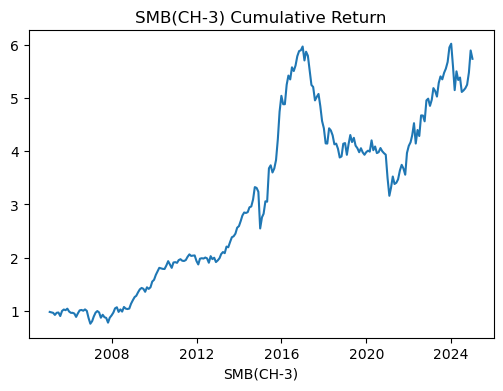

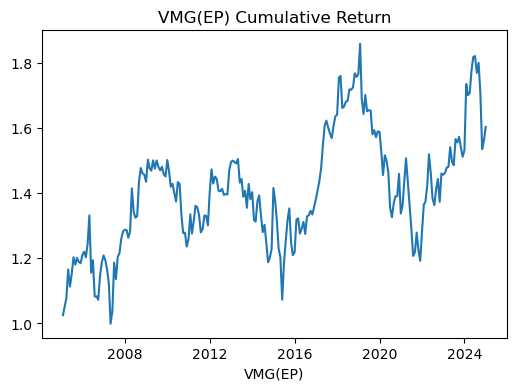

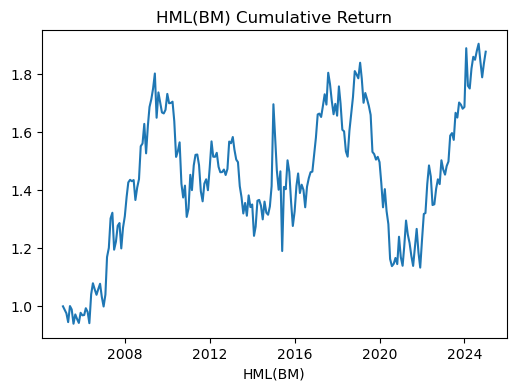

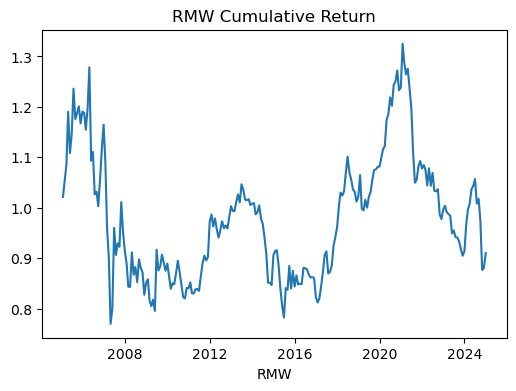

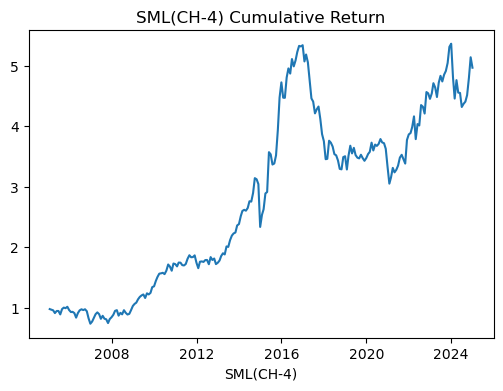

In [93]:
# 第一张图：SMB(CH-3) 因子累计收益率
plt.figure(figsize=(6, 4))
plt.plot((df_factor['liu3_smb'] + 1).cumprod())
plt.xlabel('SMB(CH-3)')
plt.title('SMB(CH-3) Cumulative Return')
plt.show()

# 第二张图：VMG(EP) 因子累计收益率
plt.figure(figsize=(6, 4))
plt.plot((df_factor['liu3_hml'] + 1).cumprod())
plt.xlabel('VMG(EP)')
plt.title('VMG(EP) Cumulative Return')
plt.show()

# 第三张图：HML(BM) 因子累计收益率
plt.figure(figsize=(6, 4))
plt.plot((df_factor['liu4_hml'] + 1).cumprod())
plt.xlabel('HML(BM)')
plt.title('HML(BM) Cumulative Return')
plt.show()

# 第四张图：RMW 因子累计收益率
plt.figure(figsize=(6, 4))
plt.plot((df_factor['liu4_rmw'] + 1).cumprod())
plt.xlabel('RMW')
plt.title('RMW Cumulative Return')
plt.show()

# 第5张图：SMB(CH-4) 因子累计收益率
plt.figure(figsize=(6, 4))
plt.plot((df_factor['liu4_smb'] + 1).cumprod())
plt.xlabel('SML(CH-4)')
plt.title('SML(CH-4) Cumulative Return')
plt.show()

In [94]:
# 定义计算单个因子月均收益率的函数
def calculate_monthly_factor_return(factor_data, factor_name):
    """
    计算单个因子的月均收益率
    :param factor_data: 包含因子收益率的数据框
    :param factor_name: 因子名称
    :return: 月均收益率
    """
    # 计算月均收益率
    monthly_mean_return = factor_data[factor_name].mean()
    return monthly_mean_return

# 计算Liu3因子的月均收益率
liu3_smb_monthly_mean = calculate_monthly_factor_return(df_factor, 'liu3_smb')
liu3_hml_monthly_mean = calculate_monthly_factor_return(df_factor, 'liu3_hml')

# 计算Liu4因子的月均收益率
liu4_smb_monthly_mean = calculate_monthly_factor_return(df_factor, 'liu4_smb')
liu4_hml_monthly_mean = calculate_monthly_factor_return(df_factor, 'liu4_hml')
liu4_rmw_monthly_mean = calculate_monthly_factor_return(df_factor, 'liu4_rmw')

# 打印结果
print(f"Liu3 SMB 月均收益率: {liu3_smb_monthly_mean:.4f}")
print(f"Liu3 HML 月均收益率: {liu3_hml_monthly_mean:.4f}")
print(f"Liu4 SMB 月均收益率: {liu4_smb_monthly_mean:.4f}")
print(f"Liu4 HML 月均收益率: {liu4_hml_monthly_mean:.4f}")
print(f"Liu4 RMW 月均收益率: {liu4_rmw_monthly_mean:.4f}")

Liu3 SMB 月均收益率: 0.0085
Liu3 HML 月均收益率: 0.0028
Liu4 SMB 月均收益率: 0.0080
Liu4 HML 月均收益率: 0.0037
Liu4 RMW 月均收益率: 0.0004


In [95]:
df_factor

,liu3_smb,liu3_hml,liu4_smb,liu4_hml,liu4_rmw
date,,,,,
2005-01-31,-0.02234,0.025543,-0.025937,-0.000256,0.021601
2005-03-31,-0.017378,0.051765,-0.021029,-0.024123,0.062706
2005-04-30,-0.040784,0.080831,-0.047806,-0.030876,0.096366
2005-05-31,0.044351,-0.045049,0.038434,0.058299,-0.068848
2005-06-30,0.004627,0.03471,-0.000135,-0.01159,0.033831
...,...,...,...,...,...
2024-08-31,0.008119,0.017555,0.008308,0.013125,0.009444
2024-09-30,0.012537,-0.052394,0.024525,-0.031287,-0.042186
2024-10-31,0.043881,-0.09993,0.063297,-0.03038,-0.100487


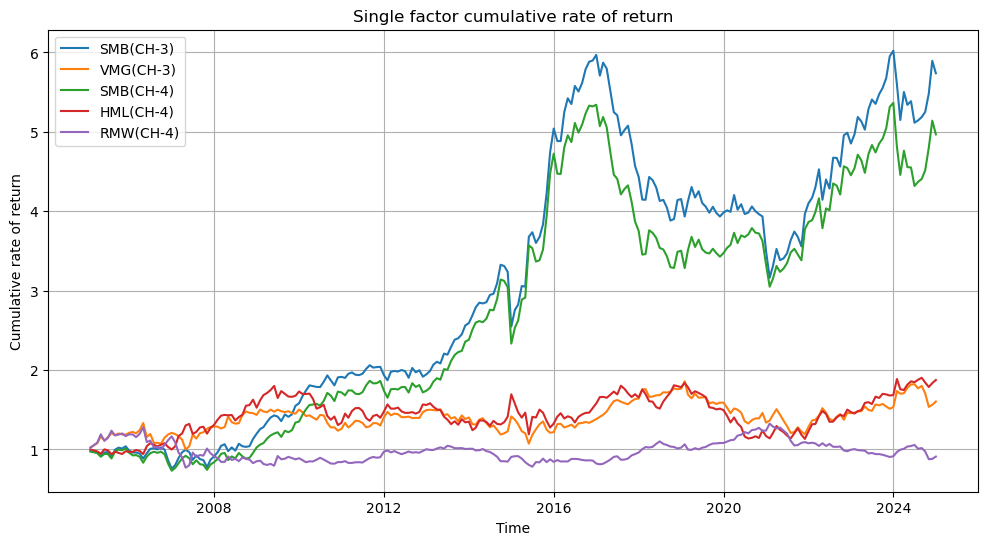

In [96]:
# 保存原始列名
original_columns = df_factor.columns.tolist()

# 修改列名
df_factor = df_factor.rename(columns={
    'liu3_smb': 'SMB(CH-3)',
    'liu3_hml': 'VMG(CH-3)',
    'liu4_smb': 'SMB(CH-4)',
    'liu4_hml': 'HML(CH-4)',
    'liu4_rmw': 'RMW(CH-4)'
})

plt.figure(figsize=(12, 6))
for factor in df_factor.columns:
    plt.plot((df_factor[factor] + 1).cumprod(), label=factor)
plt.title('Single factor cumulative rate of return')
plt.xlabel('Time')
plt.ylabel('Cumulative rate of return')
plt.legend()
plt.grid(True)  # 添加网格线
plt.show()

# 恢复原始列名
df_factor.columns = original_columns

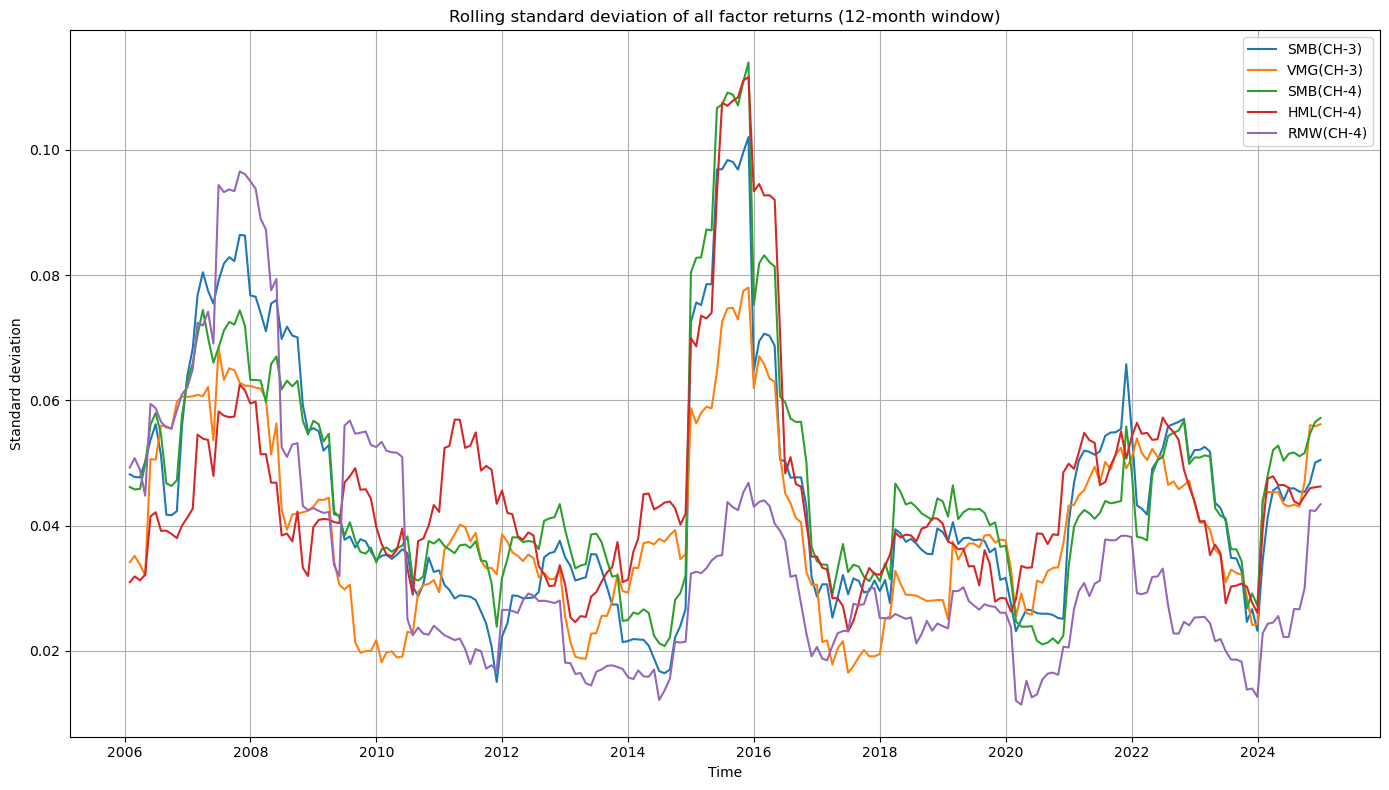

In [97]:
# 保存原始列名
original_columns = df_factor.columns.tolist()

# 修改列名
df_factor = df_factor.rename(columns={
    'liu3_smb': 'SMB(CH-3)',
    'liu3_hml': 'VMG(CH-3)',
    'liu4_smb': 'SMB(CH-4)',
    'liu4_hml': 'HML(CH-4)',
    'liu4_rmw': 'RMW(CH-4)'
})

# 计算所有因子的滚动标准差
rolling_std_liu3_smb = df_factor['SMB(CH-3)'].rolling(window=12).std()
rolling_std_liu3_hml = df_factor['VMG(CH-3)'].rolling(window=12).std()
rolling_std_liu4_smb = df_factor['SMB(CH-4)'].rolling(window=12).std()
rolling_std_liu4_hml = df_factor['HML(CH-4)'].rolling(window=12).std()
rolling_std_liu4_rmw = df_factor['RMW(CH-4)'].rolling(window=12).std()

# 绘制所有因子的滚动标准差
plt.figure(figsize=(14, 8))

# 绘制每个因子的滚动标准差
plt.plot(df_factor.index, rolling_std_liu3_smb, label='SMB(CH-3)')
plt.plot(df_factor.index, rolling_std_liu3_hml, label='VMG(CH-3)')
plt.plot(df_factor.index, rolling_std_liu4_smb, label='SMB(CH-4)')
plt.plot(df_factor.index, rolling_std_liu4_hml, label='HML(CH-4)')
plt.plot(df_factor.index, rolling_std_liu4_rmw, label='RMW(CH-4)')

# 添加标题和标签
plt.title('Rolling standard deviation of all factor returns (12-month window)')
plt.xlabel('Time')
plt.ylabel('Standard deviation')
plt.legend(loc='upper right', frameon=True)
plt.grid(True)  # 添加网格线
plt.tight_layout()  # 自动调整布局
plt.show()


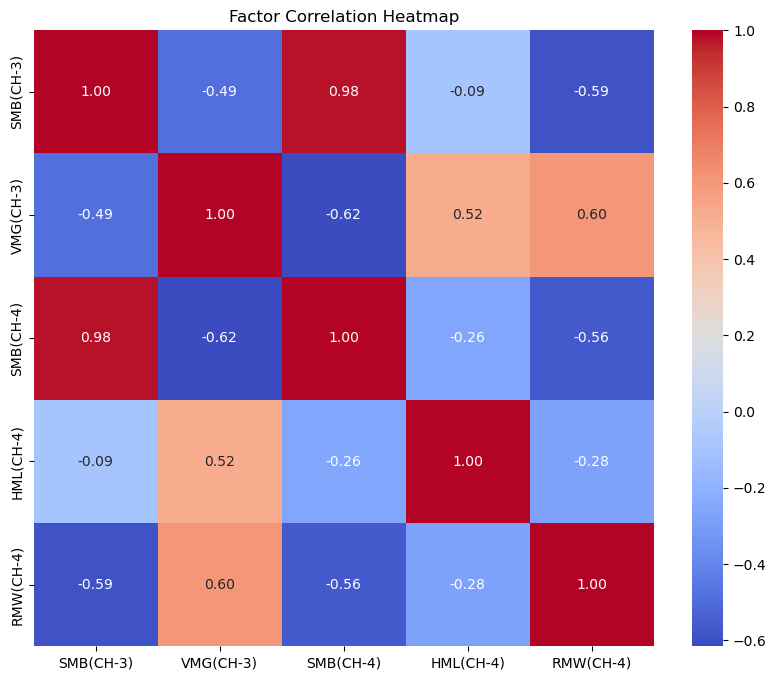

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# 计算相关性矩阵
corr_matrix = df_factor.corr()

# 绘制热力图
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Factor Correlation Heatmap')
plt.show()

# 恢复原始列名
df_factor.columns = original_columns

In [99]:
#调用科学计算包
import statsmodels.api as sm
import statsmodels.formula.api as smf
#使用异象检验Liu ，Stambaugh and Yuan（2019）三因子模型效率(以投资和动量为例)
df_test = pd.merge(df_factor,fd_dl_inv,how='inner',on='date')
df_test = df_test.astype(float) #将所有数据类型转换为浮点型
np.seterr(divide='ignore',invalid='ignore')#去除不可逆矩阵
winsorize(df_test.all(),limits=[0.01, 0.01]) #对所有列进行上下1%的缩尾处理
result_one = smf.ols(formula = 'CMA1 ~  RiskPremium1 + liu3_smb + liu3_hml', data=df_test).fit()
result_one.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CMA1   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     9.490
Date:                Sat, 04 Jan 2025   Prob (F-statistic):           6.11e-06
Time:                        00:40:28   Log-Likelihood:                 494.77
No. Observations:                 238   AIC:                            -981.5
Df Residuals:                     234   BIC:                            -967.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0011      0.002      0.531      0.596      -0.003       0.005
RiskPremium1     0.0211      0.024      0.874      0.383      -0.027       0.069
liu3_smb         0.2134      0.047      4.548      0.000       0.121       0.306
liu3_hml         0.0351      0.062      0.569      0.570      -0.086       0.157
==============================================================================
Omnibus:                       15.100   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               26.926
Skew:                           0.341   Prob(JB):                     1.42e-06
Kurtosis:                       4.500   Cond. No.                         33.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
result_two = smf.ols(formula = 'UMD1 ~  RiskPremium1 + liu3_smb + liu3_hml', data=df_test).fit()
result_two.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   UMD1   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     17.65
Date:                Sat, 04 Jan 2025   Prob (F-statistic):           2.30e-10
Time:                        00:40:28   Log-Likelihood:                 370.66
No. Observations:                 238   AIC:                            -733.3
Df Residuals:                     234   BIC:                            -719.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0080      0.003      2.288      0.023       0.001       0.015
RiskPremium1    -0.0226      0.041     -0.554      0.580      -0.103       0.058
liu3_smb        -0.5520      0.079     -6.985      0.000      -0.708      -0.396
liu3_hml        -0.4656      0.104     -4.484      0.000      -0.670      -0.261
==============================================================================
Omnibus:                       21.407   Durbin-Watson:                   2.203
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.839
Skew:                          -0.543   Prob(JB):                     4.49e-08
Kurtosis:                       4.494   Cond. No.                         33.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
#使用异象检验Liu，Shi and Lian（2019）四因子模型效率(以投资和动量为例)
model_three = sm.OLS(df_test['CMA1'], sm.add_constant(
        df_test[['RiskPremium1','liu4_smb','liu4_hml','liu4_rmw']].values))
result_three = model_three.fit()
print(result_three.summary())

                            OLS Regression Results                            
Dep. Variable:                   CMA1   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     12.88
Date:                Sat, 04 Jan 2025   Prob (F-statistic):           1.73e-09
Time:                        00:40:28   Log-Likelihood:                 504.87
No. Observations:                 238   AIC:                            -999.7
Df Residuals:                     233   BIC:                            -982.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0015      0.002      0.746      0.4

In [102]:
model_four = sm.OLS(df_test['UMD1'], sm.add_constant(
        df_test[['RiskPremium1','liu4_smb','liu4_hml','liu4_rmw']].values))
result_four = model_four.fit()
print(result_four.summary())

                            OLS Regression Results                            
Dep. Variable:                   UMD1   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     25.59
Date:                Sat, 04 Jan 2025   Prob (F-statistic):           1.37e-17
Time:                        00:40:28   Log-Likelihood:                 389.72
No. Observations:                 238   AIC:                            -769.4
Df Residuals:                     233   BIC:                            -752.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0088      0.003      2.699      0.0

Text(0.5, 0, 'CMA')

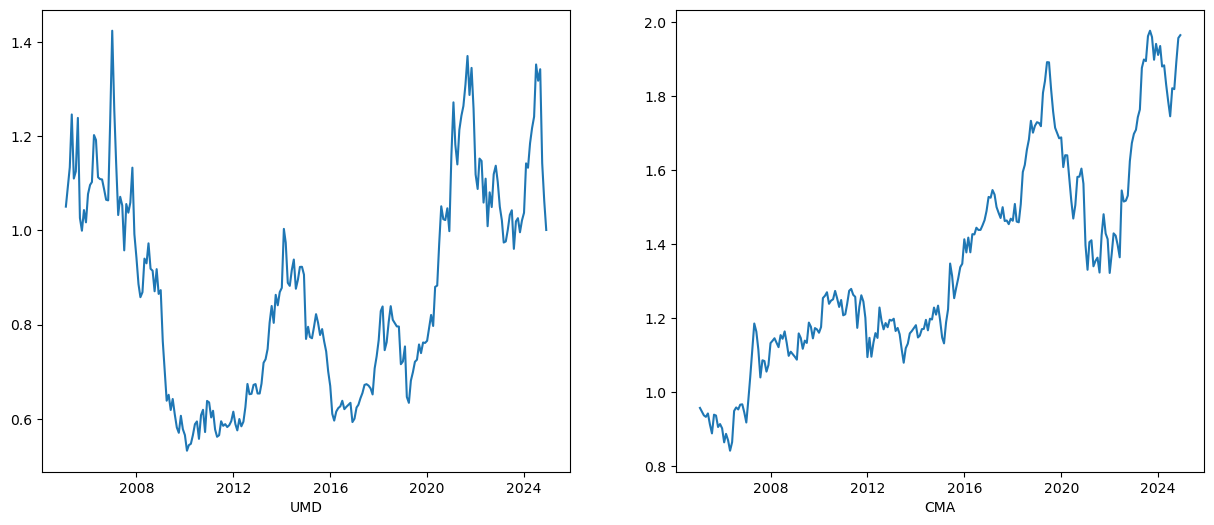

In [103]:
#画出因子的累计收益率
fig = plt.figure(figsize=(15,6))
ax5 = fig.add_subplot(1,2,1)
ax5.plot((df_test['UMD1']+1).cumprod())
ax5.set_xlabel('UMD')
ax6 = fig.add_subplot(1,2,2)
ax6.plot((df_test['CMA1']+1).cumprod())
ax6.set_xlabel('CMA')

In [104]:
#模型之间的对比（GRS检验）
#先使用liu3_smb和liu3_hml作为测试资产
#计算残差待用
result_liu3_smb = smf.ols(formula = 'liu3_smb ~ RiskPremium1 + liu4_smb + liu4_hml + liu4_rmw' ,data = df_test).fit()
result_liu3_hml = smf.ols(formula = 'liu3_hml ~ RiskPremium1 + liu4_smb + liu4_hml + liu4_rmw' ,data = df_test).fit()
res_liu3 = np.array([result_liu3_smb.resid.values , result_liu3_hml.resid.values])#将两个数组在列上合并
res_liu3 = res_liu3.T #转置获得T*2的数组
alpha3 = np.array([[result_liu3_smb.params[0]],[result_liu3_hml.params[0]]]) #获得2*1的定价误差数组
factor3 = np.array([df_test['RiskPremium1'].values ,df_test['liu4_smb'].values,df_test['liu4_hml'].values,df_test['liu4_rmw'].values])
factor3 = factor3.T

In [105]:
0#调用线性代数相关包
import scipy
from numpy.linalg import inv
def GRS(alpha, resids, factor):
    # GRS test statistic
    # N个待检验资产组合, L个因子, and T 时间周期
    # alpha是定价误差，Nx1的数组
    # resids回归的残差，TxN的数组
    # factor是因子收益率，TxL的数组
    T, N = resids.shape
    L = factor.shape[1]
    factor_mean = np.nanmean(factor, axis=0)
    cov_resids = np.matmul(resids.T, resids) / (T-L-1)
    cov_fac = np.matmul(np.array(factor - np.nanmean(factor, axis=0)).T, np.array(factor - np.nanmean(factor, axis=0))) / T-1
    GRS = (T / N) * ((T - N - L) / (T - L - 1)) * ((np.matmul(np.matmul(alpha.T, inv(cov_resids)), alpha)) / (1 + (np.matmul(np.matmul(factor_mean.T, inv(cov_fac)), factor_mean))))
    pVal = 1 - scipy.stats.f.cdf(GRS, N, T - N - L) #需引用F分布“scipy.stats.f”
    return GRS, pVal

In [106]:
GRS_liu3 , Pval_liu3 = GRS(alpha3, res_liu3, factor3)
Pval_liu3

array([[0.43853393]])

In [107]:
#再使用liu4_smb、liu4_hml和liu4_rmw作为测试资产
result_liu4_smb = smf.ols(formula = 'liu4_smb ~ RiskPremium1 + liu3_smb + liu3_hml' ,data = df_test).fit()
result_liu4_hml = smf.ols(formula = 'liu4_hml ~ RiskPremium1 + liu3_smb + liu3_hml' ,data = df_test).fit()
result_liu4_rmw = smf.ols(formula = 'liu4_rmw ~ RiskPremium1 + liu3_smb + liu3_hml' ,data = df_test).fit()
res_liu4 = np.array([result_liu4_smb.resid.values , result_liu4_hml.resid.values , result_liu4_rmw.resid.values])#将两个数组在列上合并
res_liu4 = res_liu4.T #转置获得T*2的数组
alpha4 = np.array([[result_liu4_smb.params[0]],[result_liu4_hml.params[0]],[result_liu4_rmw.params[0]]]) #获得2*1的定价误差数组
factor4 = np.array([df_test['liu4_smb'].values,df_test['liu4_hml'].values,df_test['liu4_rmw'].values])
factor4 = factor4.T

In [108]:
GRS_liu4 , Pval_liu4 = GRS(alpha4, res_liu4, factor4)
Pval_liu4

array([[0.05113772]])

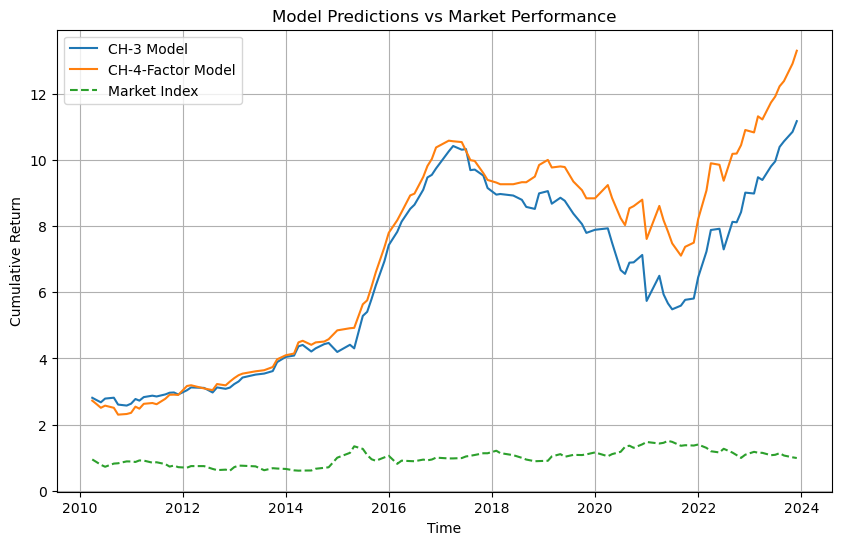

In [109]:
# 获取沪深300指数数据
df_market = pro.index_daily(ts_code='000300.SH', start_date='20100101', end_date='20231231')
df_market['trade_date'] = pd.to_datetime(df_market['trade_date'])
df_market.set_index('trade_date', inplace=True)
df_market = df_market.sort_index()

# 计算市场收益率
df_market['market_return'] = df_market['close'].pct_change()

# 1. 计算两个模型的累计收益率
df_factor['liu3_cumulative'] = (df_factor['liu3_smb'] + df_factor['liu3_hml'] + 1).cumprod()
df_factor['liu4_cumulative'] = (df_factor['liu4_smb'] + df_factor['liu4_hml'] + df_factor['liu4_rmw'] + 1).cumprod()

# 2. 计算市场基准的累计收益率
# 假设 df_market 包含市场指数的收益率列 'market_return'
df_market['market_cumulative'] = (df_market['market_return'] + 1).cumprod()

# 3. 合并数据以便比较
df_comparison = pd.merge(df_factor[['liu3_cumulative', 'liu4_cumulative']], df_market[['market_cumulative']], left_index=True, right_index=True, how='inner')

# 4. 绘制比较图
plt.figure(figsize=(10, 6))
plt.plot(df_comparison.index, df_comparison['liu3_cumulative'], label='CH-3 Model')
plt.plot(df_comparison.index, df_comparison['liu4_cumulative'], label='CH-4-Factor Model')
plt.plot(df_comparison.index, df_comparison['market_cumulative'], label='Market Index', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Cumulative Return')
plt.title('Model Predictions vs Market Performance')
plt.legend()
plt.grid(True)
plt.show()

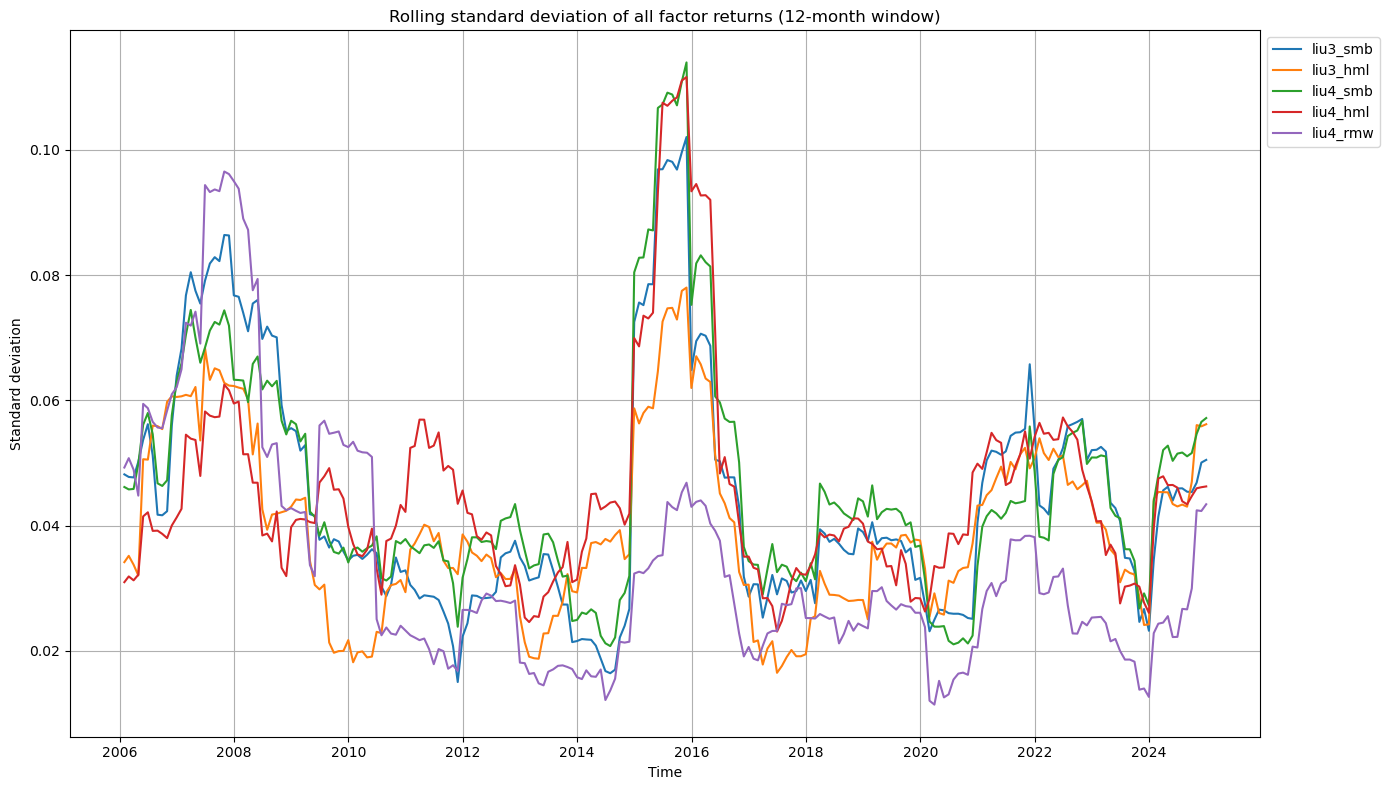

In [110]:
# 计算所有因子的滚动标准差
rolling_std_liu3_smb = df_factor['liu3_smb'].rolling(window=12).std()
rolling_std_liu3_hml = df_factor['liu3_hml'].rolling(window=12).std()
rolling_std_liu4_smb = df_factor['liu4_smb'].rolling(window=12).std()
rolling_std_liu4_hml = df_factor['liu4_hml'].rolling(window=12).std()
rolling_std_liu4_rmw = df_factor['liu4_rmw'].rolling(window=12).std()

# 绘制所有因子的滚动标准差
plt.figure(figsize=(14, 8))

# 绘制每个因子的滚动标准差
plt.plot(df_factor.index, rolling_std_liu3_smb, label='liu3_smb')
plt.plot(df_factor.index, rolling_std_liu3_hml, label='liu3_hml')
plt.plot(df_factor.index, rolling_std_liu4_smb, label='liu4_smb')
plt.plot(df_factor.index, rolling_std_liu4_hml, label='liu4_hml')
plt.plot(df_factor.index, rolling_std_liu4_rmw, label='liu4_rmw')

# 添加标题和标签
plt.title('Rolling standard deviation of all factor returns (12-month window)')
plt.xlabel('Time')
plt.ylabel('Standard deviation')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # 将图例放在图表外右侧
plt.grid(True)  # 添加网格线
plt.tight_layout()  # 自动调整布局
plt.show()

In [113]:
liu3_cumulative_return = df_factor['liu3_cumulative'].iloc[-1]
liu4_cumulative_return = df_factor['liu4_cumulative'].iloc[-1]
liu4_cumulative_return

14.221197899808322